In [1]:
# Importamos librerias
import pandas as pd
import numpy as np

In [2]:
# Cargar los datos
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigree', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=columns)
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Obtener todas las columnas menos el target 'Outcome'
X = data.iloc[:,:-1].values

# Obtener la columna target 'Outcome'
y = data.iloc[:,-1].values

from sklearn.preprocessing import StandardScaler

# En las redes neuronales siempre hay que estandarizar el dataframe
# Antes de realizar el entrenamiento
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 🧠 Construcción de la red neuronal 

In [ ]:
import setuptools.dist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input 

 
# Creamos el modelo de red neuronal 
model = Sequential([ 
    Input(shape=(X_train.shape[1],)), # Definir forma de la entrada 
    Dense(16, activation='relu'),     # 1a capa oculta 
    Dense(8, activation='relu'),      # 2a capa oculta 
    Dense(1, activation='sigmoid')    # Salida 
]) 
 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 
 
# Mostramos configuración 
model.summary() 


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
validation_split=0.2, verbose=1)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3349 - loss: 0.8809 - val_accuracy: 0.4634 - val_loss: 0.7396
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5042 - loss: 0.7251 - val_accuracy: 0.6179 - val_loss: 0.6853
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6192 - loss: 0.7008 - val_accuracy: 0.6992 - val_loss: 0.6455
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6894 - loss: 0.6589 - val_accuracy: 0.7236 - val_loss: 0.6182
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7498 - loss: 0.6091 - val_accuracy: 0.7398 - val_loss: 0.5993
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7534 - loss: 0.5945 - val_accuracy: 0.7480 - val_loss: 0.5843
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7728 - loss: 0.5812 - val_accuracy: 0.7317 - val_loss: 0.5721
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7759 - loss: 0.5467 - val_accuracy: 0.7236 - v

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7277 - loss: 0.5726 
Pérdida: 0.5637685656547546, Precisión: 0.7402597665786743


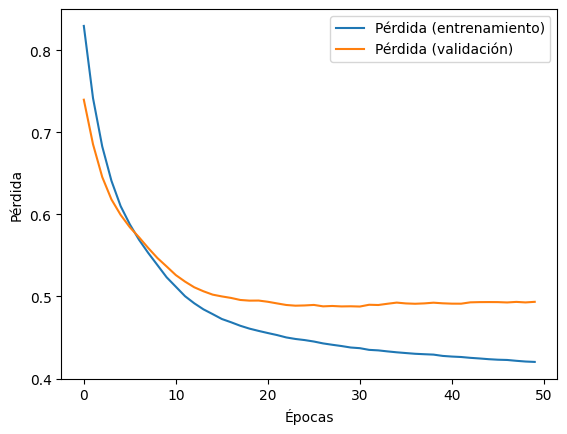

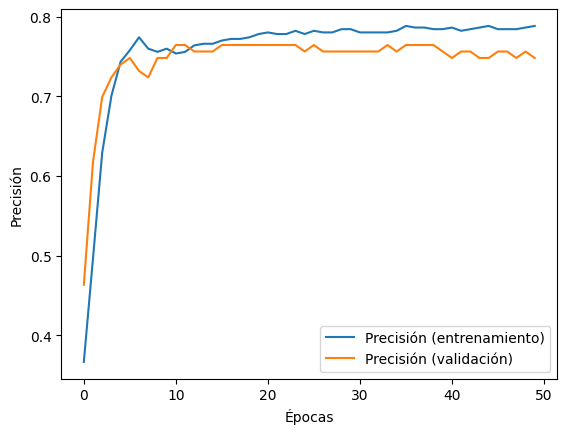

In [6]:
loss, accuracy = model.evaluate(X_test, y_test) 
print(f"Pérdida: {loss}, Precisión: {accuracy}") 
 
import matplotlib.pyplot as plt 
 
# Pérdida 
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)') 
plt.plot(history.history['val_loss'], label='Pérdida (validación)') 
plt.xlabel('Épocas') 
plt.ylabel('Pérdida') 
plt.legend() 
plt.show() 
 
# Precisión 
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)') 
plt.plot(history.history['val_accuracy'], label='Precisión (validación)') 
plt.xlabel('Épocas') 
plt.ylabel('Precisión') 
plt.legend() 
plt.show() 
